# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']
print(X.shape)

(4078, 2)


(4078, 4078)


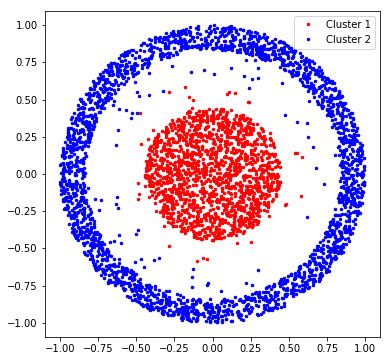

In [3]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 200
threshold = 1
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)
plt.show()

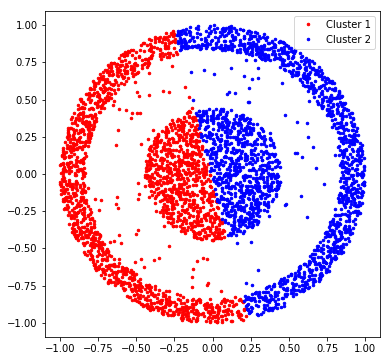

In [25]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [27]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [28]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans

# YOUR CODE HERE
# begin answer
iters = 5
threshold = 1
k_in_knn = 200
k_in_kmeans = len({}.fromkeys(gnd).keys())
kmeans_acc = 0
sc_acc = 0
kmeans_nmi = 0
sc_nmi = 0
N = len(gnd)
fea = np.array(fea.todense())
for i in range(iters):
    print("i={}".format(i))
    # kmeans
    L = kmeans(fea, k_in_kmeans)
    L = bestMap(gnd, L) 
    print('kmeans')
    print(L)
    kmeans_acc += np.sum(np.array(gnd)==np.array(L))/N
    kmeans_nmi += MutualInfo(gnd, L)
    
    # sc
    W = constructW(fea, k=8)
    L  = spectral(W, k_in_kmeans)
    L = bestMap(gnd, L)
    print('sc')
    print(L)
    sc_acc += np.sum(np.array(gnd)==np.array(L))/N
    sc_nmi += MutualInfo(gnd, L)
sc_acc/=iters
sc_nmi/=iters
kmeans_acc/=iters
kmeans_nmi/=iters
print("sc_acc={} \n sc_nmi={} \n kmeans_acc={} \n kmeans_nmi={}".format(sc_acc,sc_nmi,kmeans_acc,kmeans_nmi))
# end answer

i=0
kmeans
[13. 13. 13. ... 13. 13. 13.]
(1319, 1319)
sc
[4. 4. 4. ... 4. 4. 4.]
i=1
kmeans
[9. 9. 9. ... 9. 9. 9.]
(1319, 1319)
sc
[4. 4. 4. ... 4. 4. 4.]
i=2
kmeans
[ 4.  4.  4. ...  4. 13.  4.]
(1319, 1319)
sc
[4. 4. 4. ... 4. 4. 4.]
i=3
kmeans
[4. 4. 4. ... 4. 4. 4.]
(1319, 1319)
sc
[4. 4. 4. ... 4. 4. 4.]
i=4
kmeans
[13. 13. 13. ... 13. 13. 13.]
(1319, 1319)
sc
[4. 4. 4. ... 4. 4. 4.]
sc_acc=0.7760424564063684 
 sc_nmi=0.6100109348514013 
 kmeans_acc=0.5414708112206217 
 kmeans_nmi=0.3717758640397424
